# **(Crypto Currency Future Price Forecast Data Visualisations)**

## Objectives

- Load my one clean dataset.
- Focus on the last 365 days to keep visuals readable.
- Create per-coin charts:- Price + MA(7/30)
  - Price + MA(7/30)
  - MACD (line/signal + histogram)
  - RSI(14) with 30/70 guide lines
  - Bollinger Bands (20, 2σ)
  - Build a daily indication (BUY / HOLD / SELL) using MA + MACD + RSI.

Save PNGs and compact CSV tables in Reports/ for Power BI.

## Inputs

* DataSet/Cleaned/crypto_clean.csv




---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [18]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Nine\\OneDrive\\Documents\\VS Code Projects'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [19]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [20]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Nine\\OneDrive\\Documents'

# Section 1

Import libraries and dataset

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

CLEAN = Path("DataSet/Cleaned/crypto_clean.csv")
REPORTS = Path("Reports")
REPORTS.mkdir(exist_ok=True)

df = pd.read_csv(CLEAN, parse_dates=["Date"]).sort_values(["Symbol","Date"]).reset_index(drop=True)
print(df.shape)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'DataSet\\Cleaned\\crypto_clean.csv'

---

# Section 2

Data Visualisations

In [ ]:
# Focusing on the past 5 years (~1826 days bull market every 4 years)

cutoff = df["Date"].max() - pd.Timedelta(days=1826)
recent = df[df["Date"] >= cutoff].copy()
print("Window:", cutoff.date(), "→", df["Date"].max().date())


Window: 2020-10-14 → 2025-10-14


In [ ]:
# Daily indication (BUY / HOLD / SELL)

def add_indication(g: pd.DataFrame) -> pd.DataFrame:
    g = g.copy()
    g["trend_up"] = g["ma_7"] > g["ma_30"]
    g["macd_pos"] = g["macd_line"] > g["macd_signal"]
    buy  = g["trend_up"] & g["macd_pos"] & (g["rsi_14"] < 60)
    sell = (~g["trend_up"]) & (~g["macd_pos"]) & (g["rsi_14"] > 50)
    g["indication"] = np.select([buy, sell], ["BUY", "SELL"], default="HOLD")
    return g

recent = (recent.groupby("Symbol", group_keys=False)
                .apply(add_indication)
                .reset_index(drop=True))

# latest snapshot per coin (nice KPI table)
latest = (recent.sort_values(["Symbol","Date"])
                .groupby("Symbol")
                .tail(1))[["Symbol","Date","Close","ma_7","ma_30","rsi_14","macd_line","macd_signal","indication"]]
latest.to_csv(REPORTS / "viz_signal_snapshot_latest.csv", index=False)
latest


,Symbol,Date,Close,ma_7,ma_30,rsi_14,macd_line,macd_signal,indication
1778,BTC,2025-10-14,113196.600000,116360.514286,116217.613333,48.551510,207.126950,1094.169379,HOLD
3557,DOGE,2025-10-14,0.203692,0.214987,0.243295,42.942782,-0.010099,-0.004658,HOLD
5336,ETH,2025-10-14,4120.361000,4161.532429,4305.003700,49.254076,-52.798346,-23.064990,HOLD
7115,HBAR,2025-10-14,0.188223,0.189973,0.217411,40.498780,-0.011314,-0.008276,HOLD
8894,QNT,2025-10-14,89.724840,93.250864,98.301562,35.787155,-2.500649,-1.206625,HOLD
10673,SOL,2025-10-14,201.350700,203.800900,219.527010,47.036943,-4.741334,-1.780827,HOLD
12406,XDC,2025-10-14,0.060637,0.065003,0.072856,29.709337,-0.003828,-0.002509,HOLD
14185,XLM,2025-10-14,0.336802,0.345948,0.373930,44.441987,-0.010889,-0.005579,HOLD
15961,XRP,2025-10-14,2.496800,2.584217,2.855237,37.594345,-0.109110,-0.066034,HOLD


In [ ]:
try:
    symbols = sorted(recent["Symbol"].unique())
except NameError:
    # if 'recent' isn't defined yet, fall back to df (then recalc recent)
    symbols = sorted(df["Symbol"].unique())
    cutoff = df["Date"].max() - pd.Timedelta(days=365)
    recent = df[df["Date"] >= cutoff].copy()

print("Coins:", symbols)

Coins: ['BTC', 'DOGE', 'ETH', 'HBAR', 'QNT', 'SOL', 'XDC', 'XLM', 'XRP']


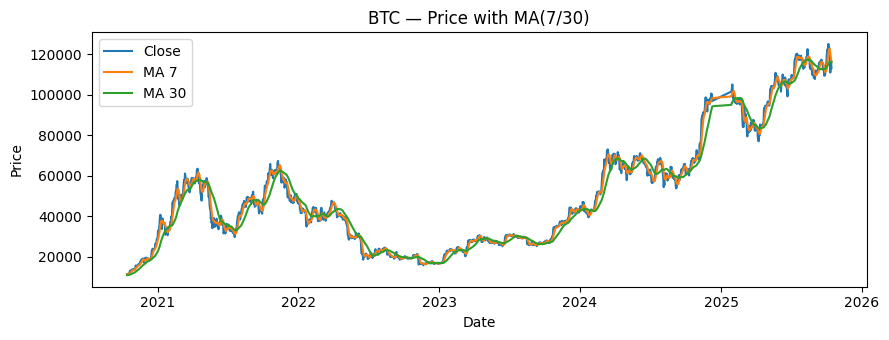

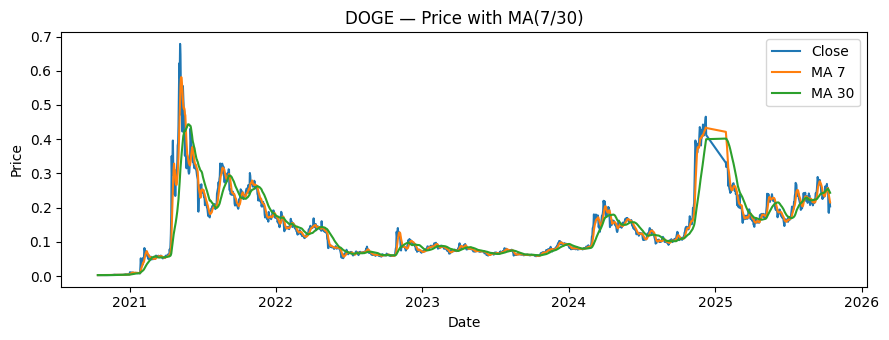

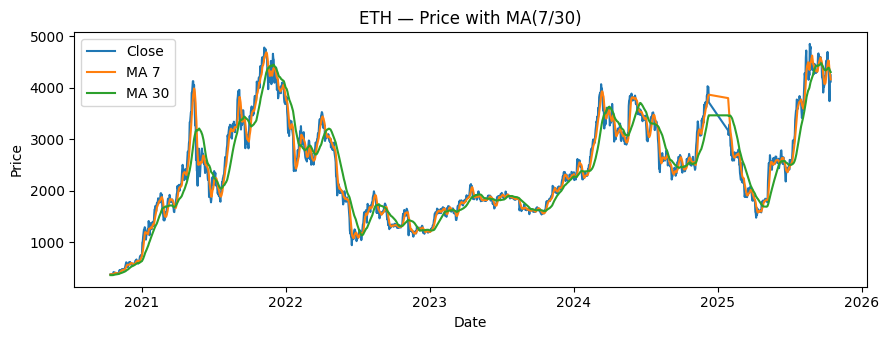

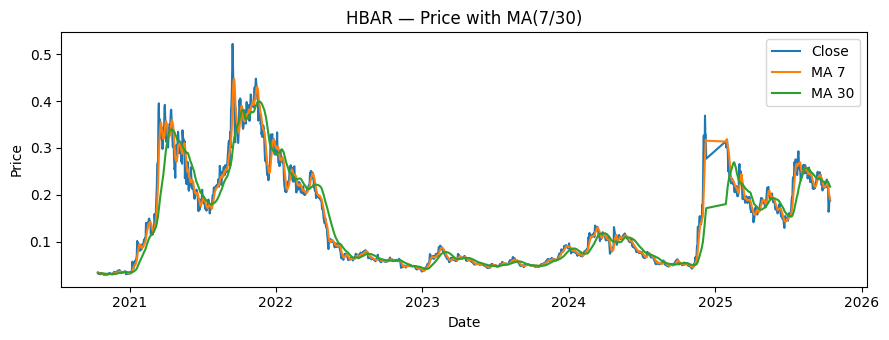

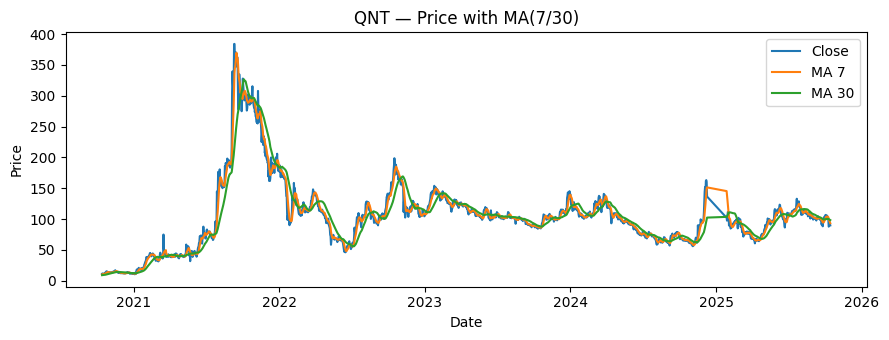

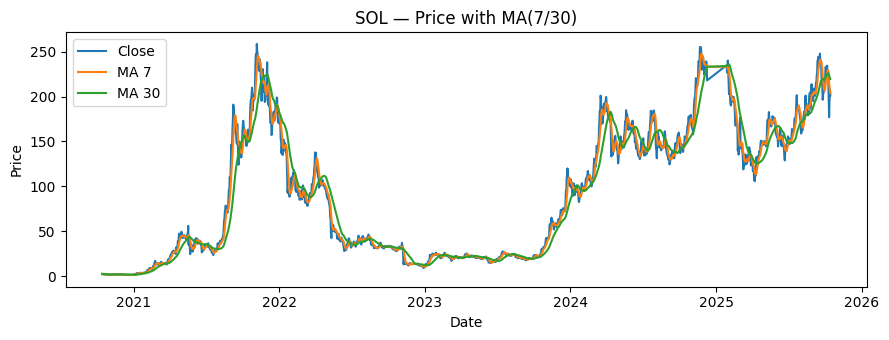

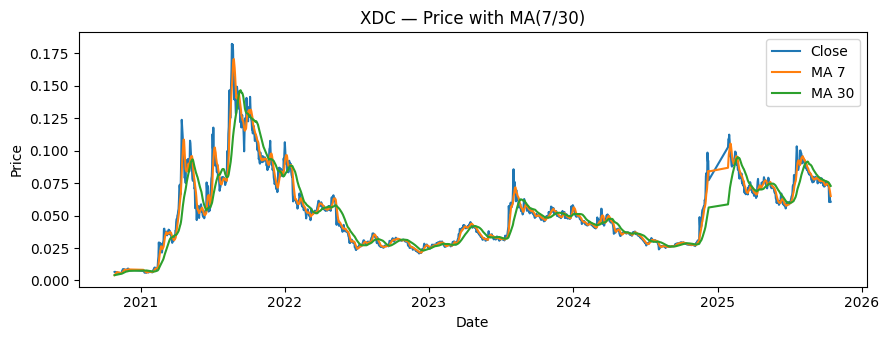

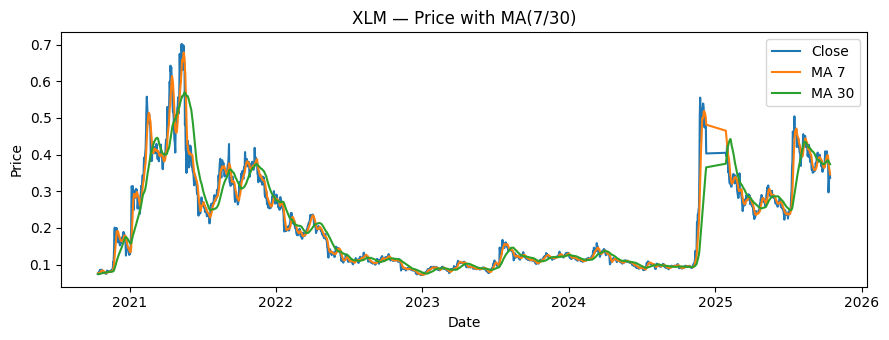

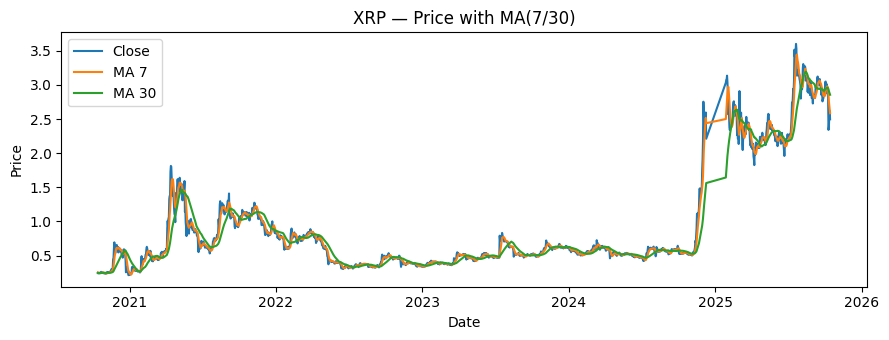

Displayed price + MA charts.


In [ ]:
for sym in symbols:
    g = recent[recent["Symbol"]==sym]

    plt.figure(figsize=(9,3.5))
    plt.plot(g["Date"], g["Close"], label="Close")
    plt.plot(g["Date"], g["ma_7"],  label="MA 7")
    plt.plot(g["Date"], g["ma_30"], label="MA 30")
    plt.title(f"{sym} — Price with MA(7/30)")
    plt.xlabel("Date"); plt.ylabel("Price")
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.close()
print("Displayed price + MA charts.")


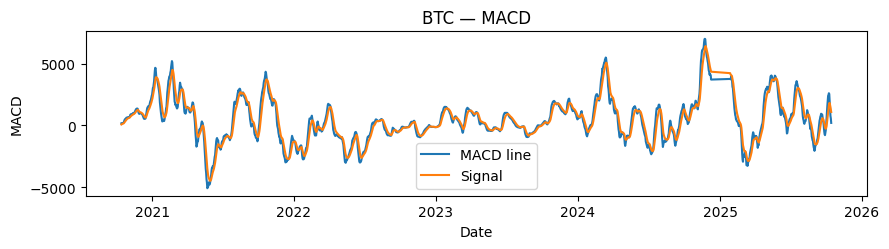

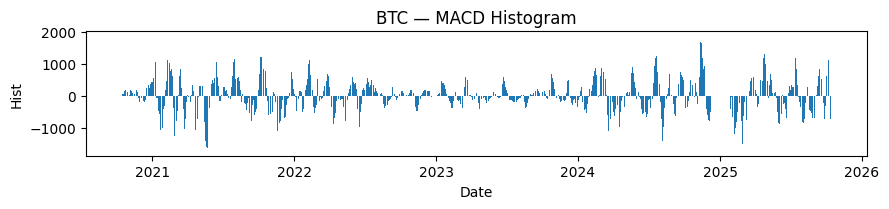

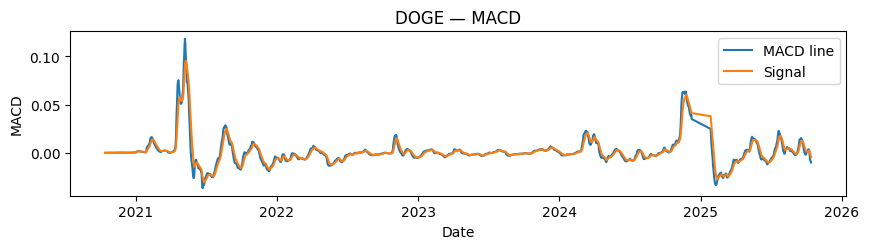

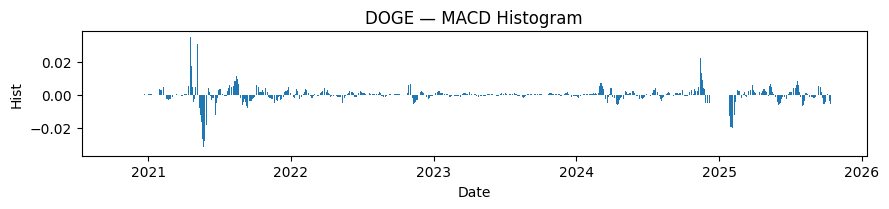

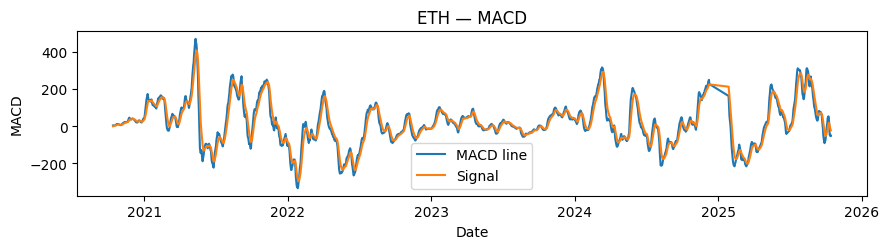

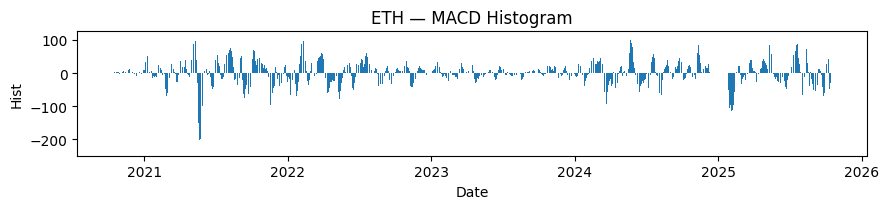

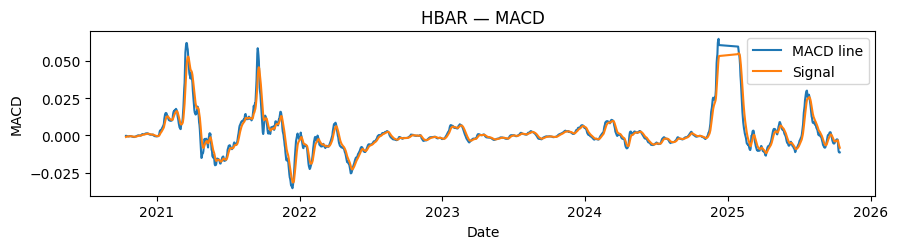

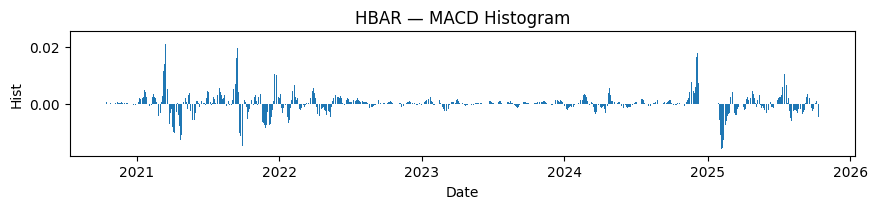

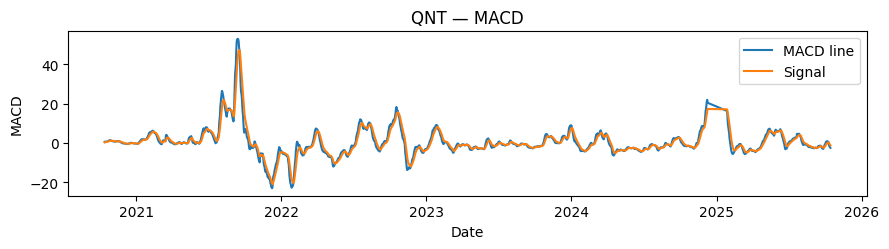

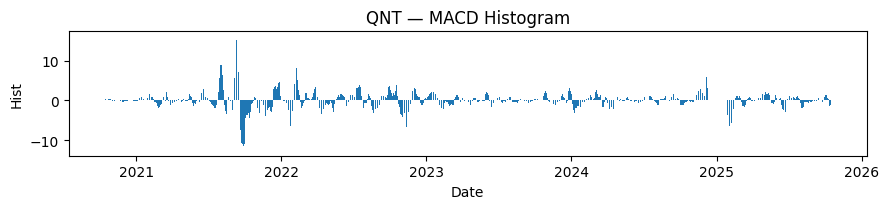

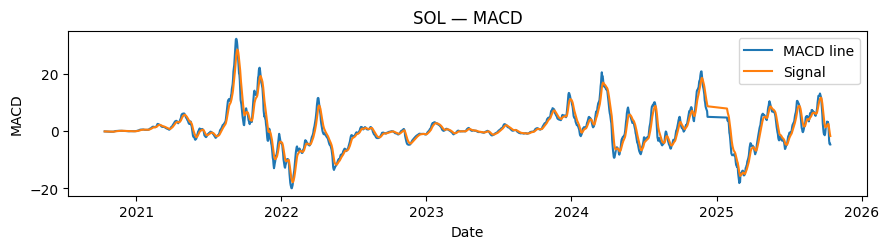

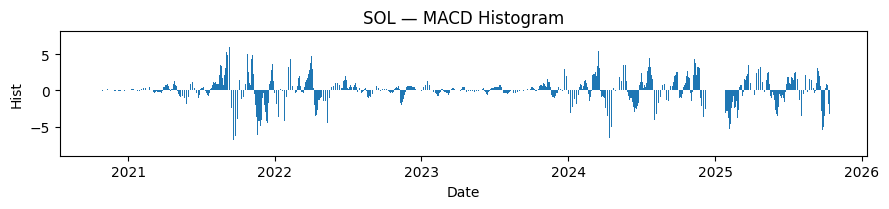

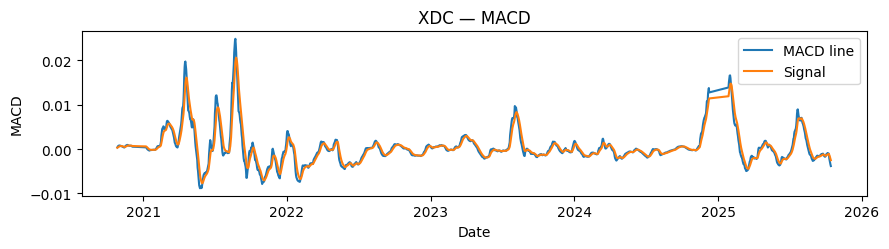

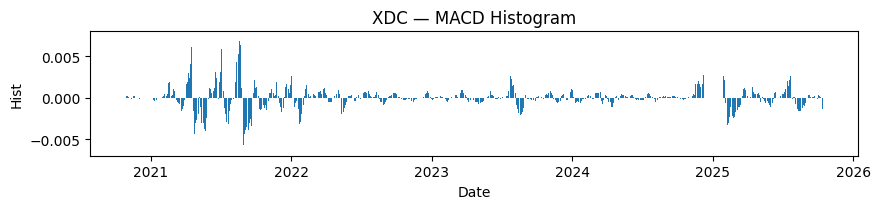

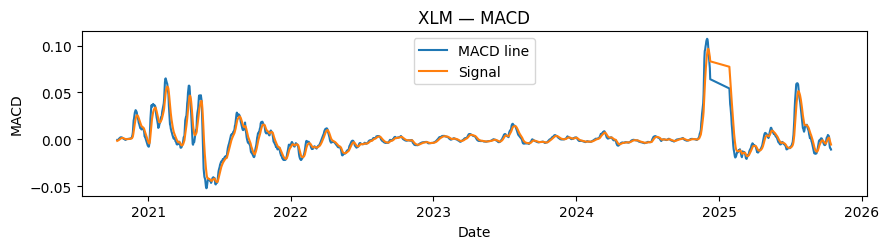

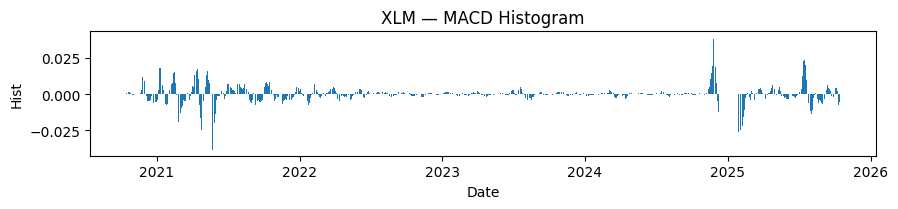

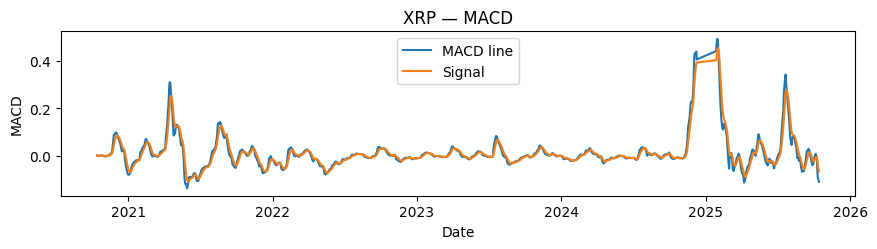

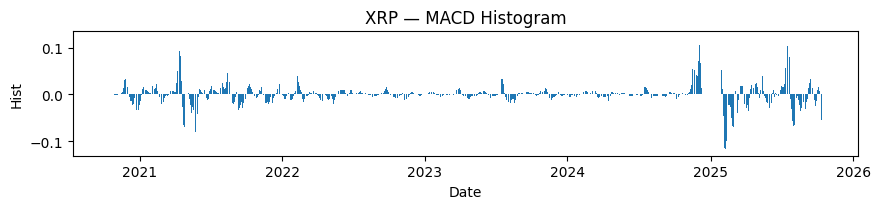

Displayed MACD charts.


In [22]:
for sym in symbols:
    g = recent[recent["Symbol"]==sym]

    # line & signal
    plt.figure(figsize=(9,2.6))
    plt.plot(g["Date"], g["macd_line"],   label="MACD line")
    plt.plot(g["Date"], g["macd_signal"], label="Signal")
    plt.title(f"{sym} — MACD")
    plt.xlabel("Date"); plt.ylabel("MACD")
    plt.legend()
    plt.tight_layout()
    plt.show()
    plt.close()

    # histogram
    plt.figure(figsize=(9,2.2))
    plt.bar(g["Date"], g["macd_hist"])
    plt.title(f"{sym} — MACD Histogram")
    plt.xlabel("Date"); plt.ylabel("Hist")
    plt.tight_layout()
    plt.show()
    plt.close()

print("Displayed MACD charts.")


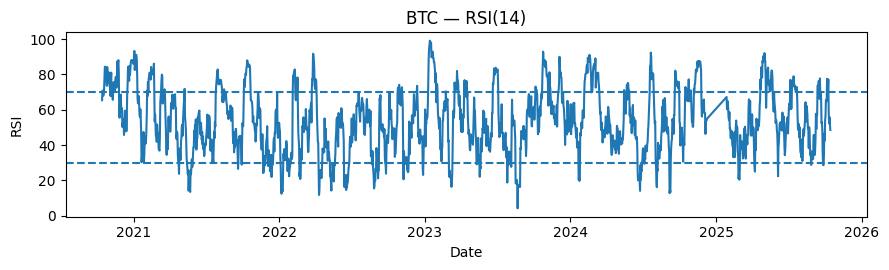

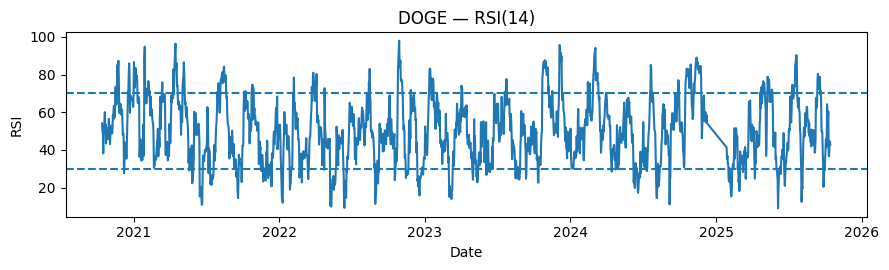

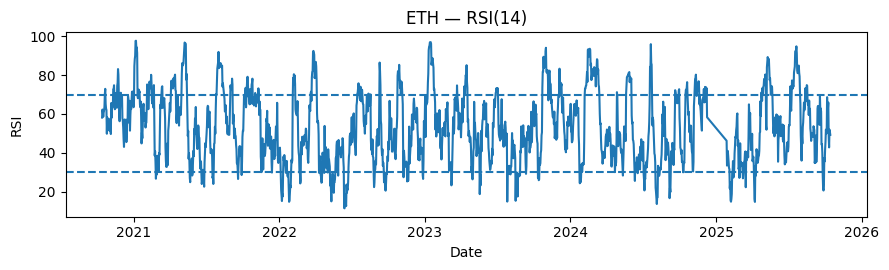

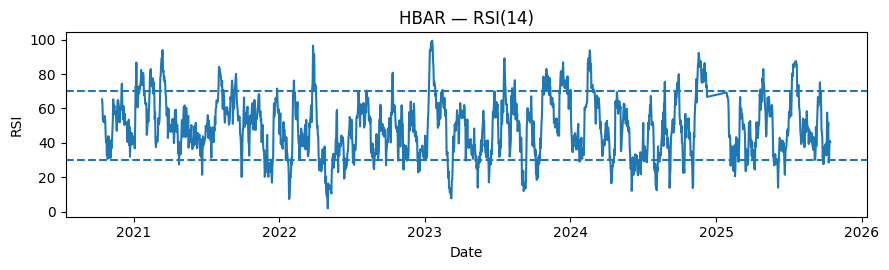

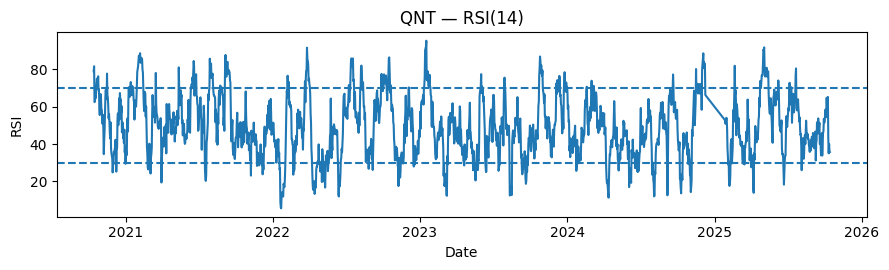

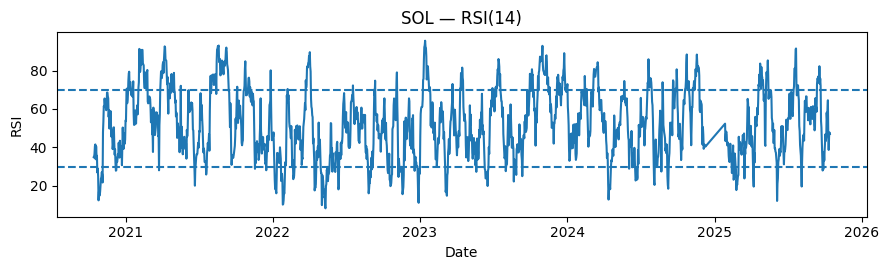

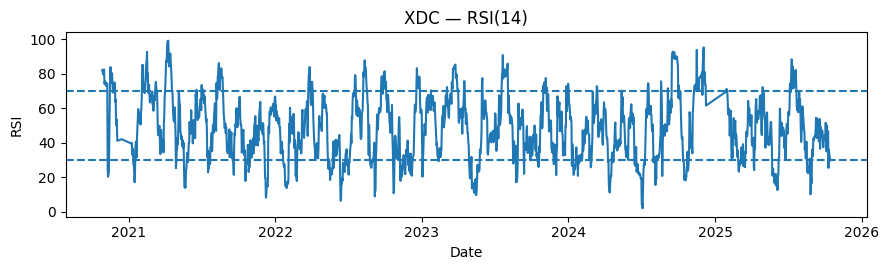

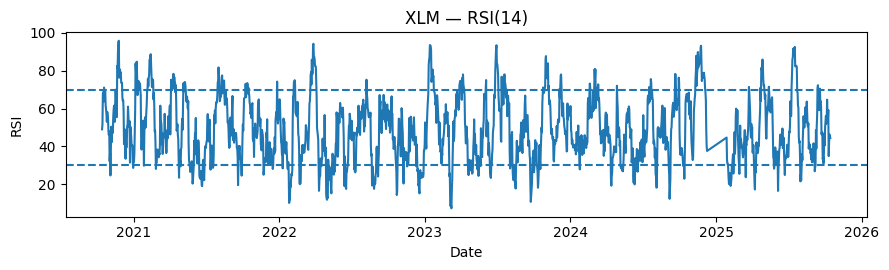

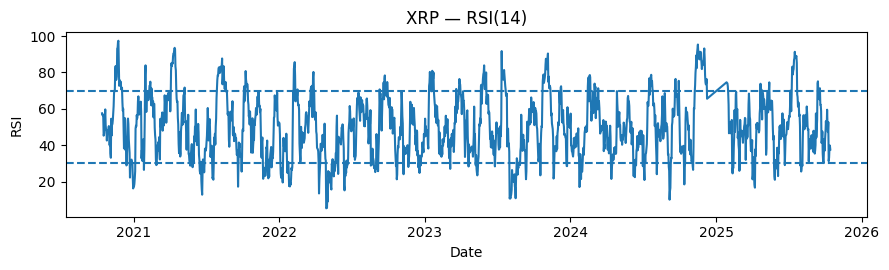

Displayed RSI charts.


In [23]:
for sym in symbols:
    g = recent[recent["Symbol"]==sym]

    plt.figure(figsize=(9,2.8))
    plt.plot(g["Date"], g["rsi_14"], label="RSI(14)")
    # guide lines
    plt.axhline(30, linestyle="--")
    plt.axhline(70, linestyle="--")
    plt.title(f"{sym} — RSI(14)")
    plt.xlabel("Date"); plt.ylabel("RSI")
    plt.tight_layout()
    plt.show()
    plt.close()

print("Displayed RSI charts.")


Symbols: ['BTC', 'DOGE', 'ETH', 'HBAR', 'QNT', 'SOL', 'XDC', 'XLM', 'XRP']


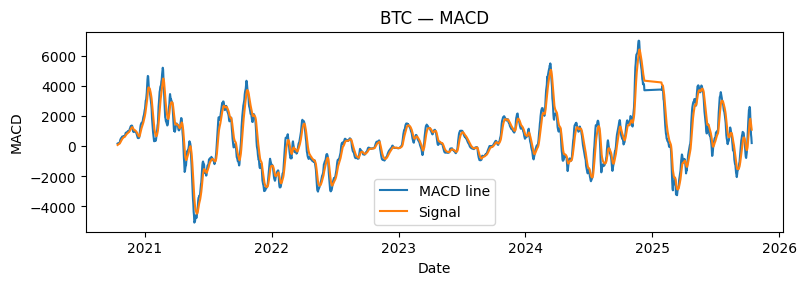

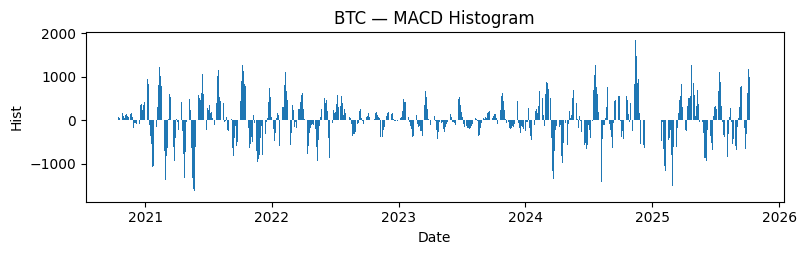

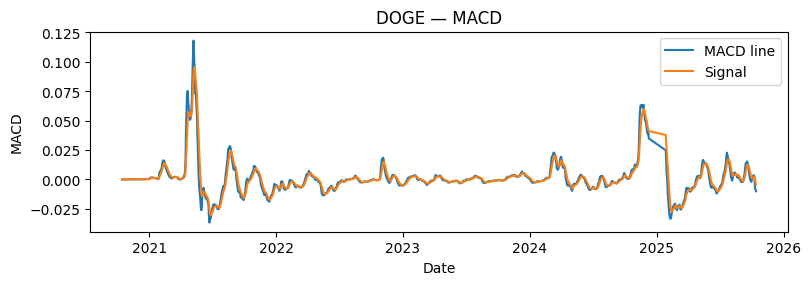

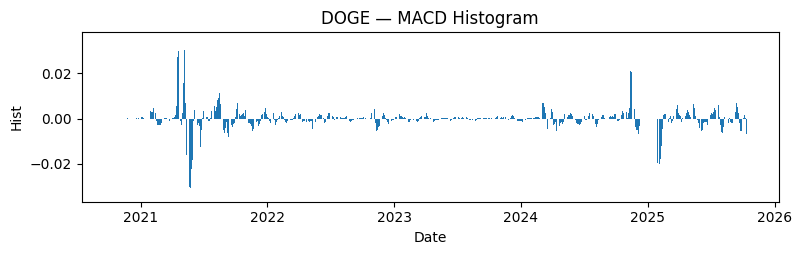

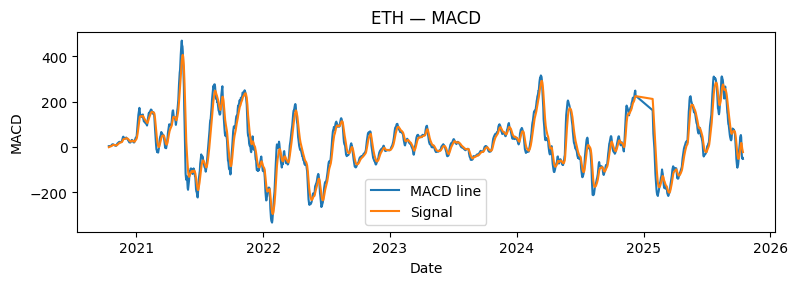

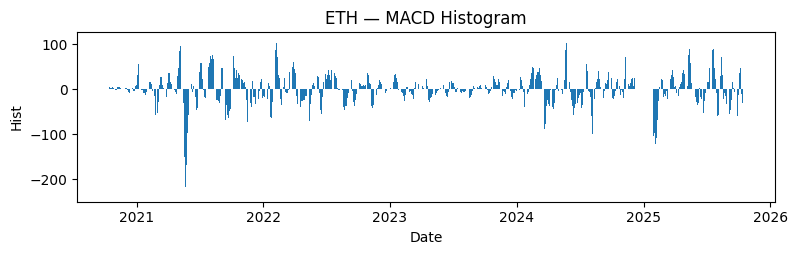

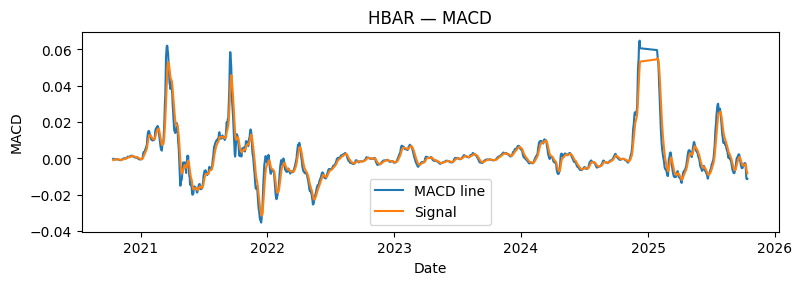

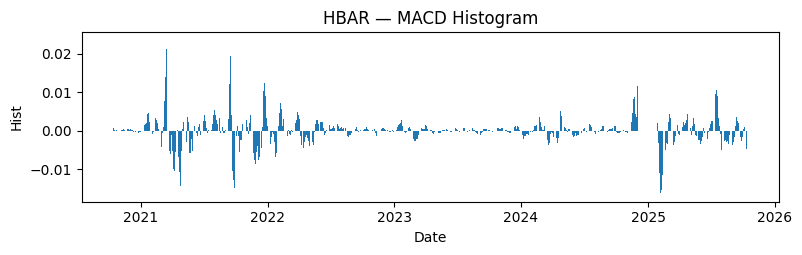

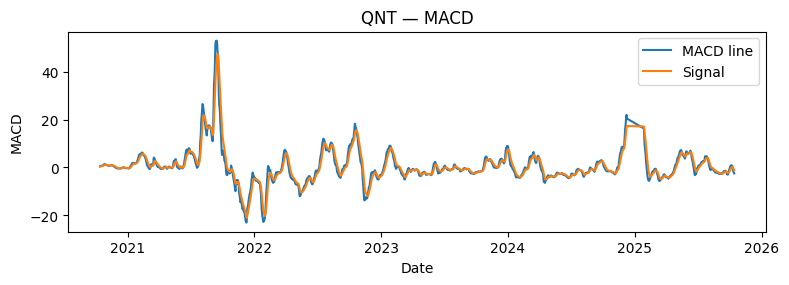

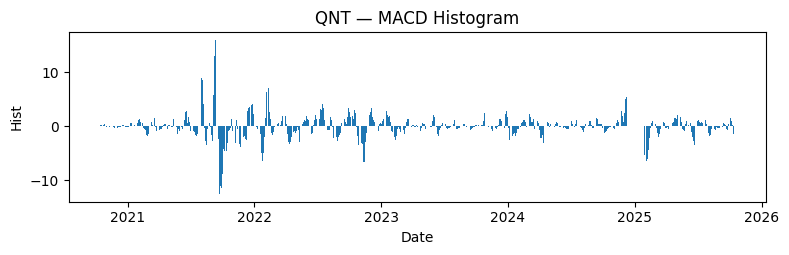

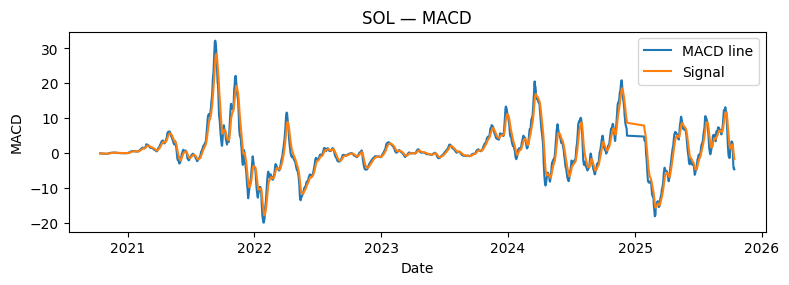

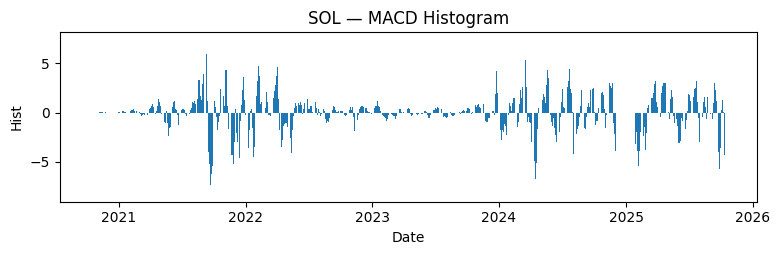

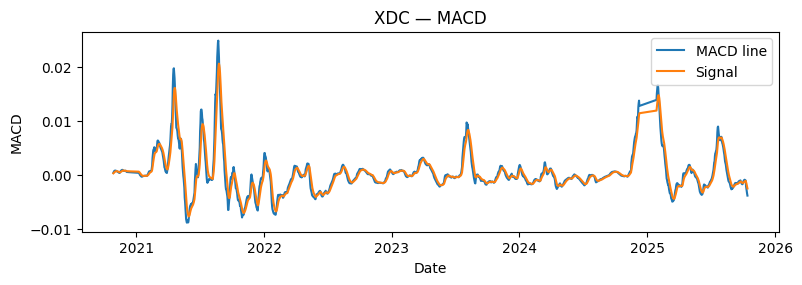

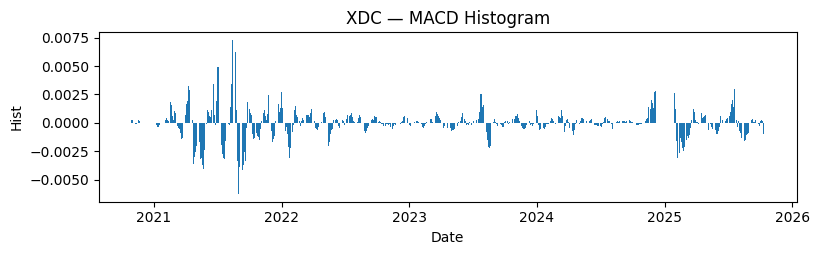

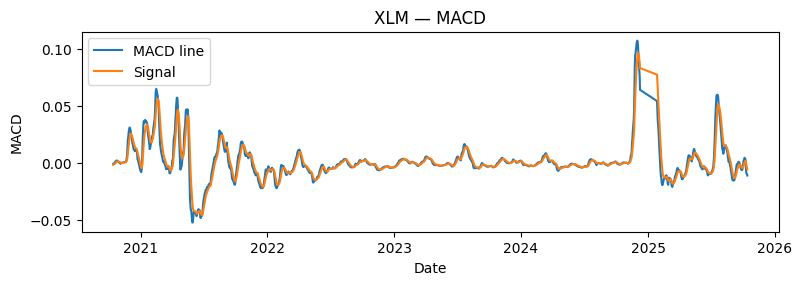

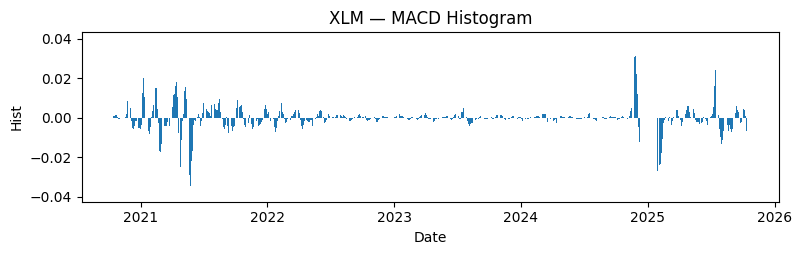

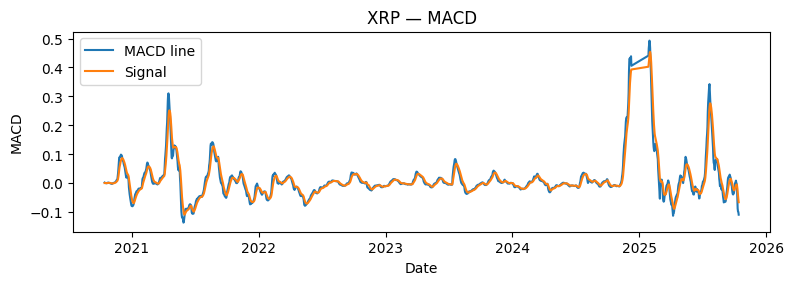

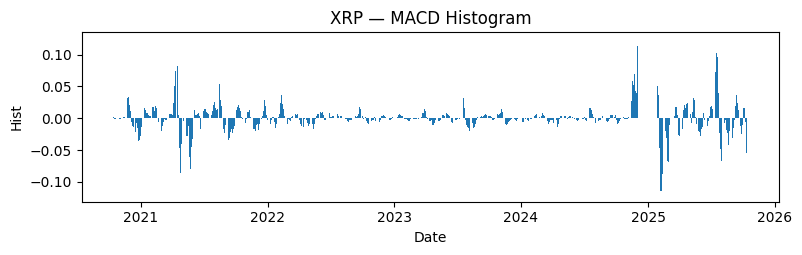

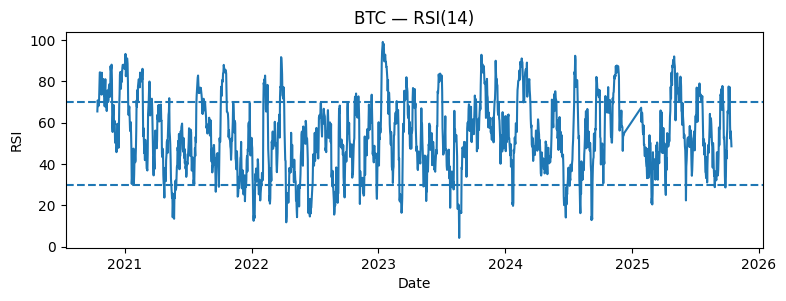

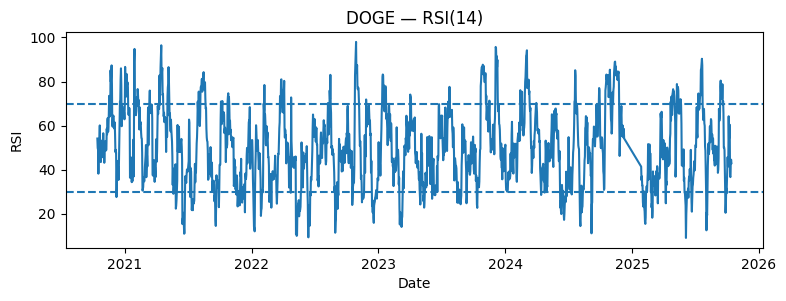

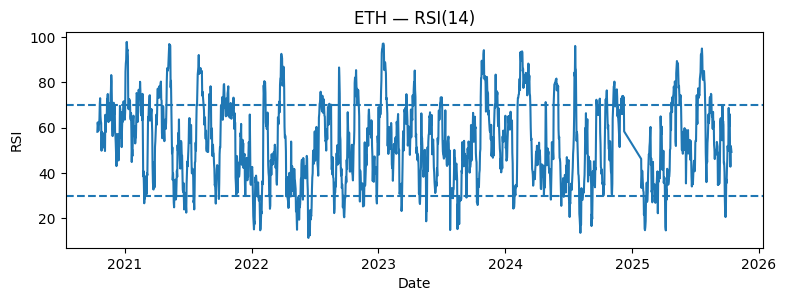

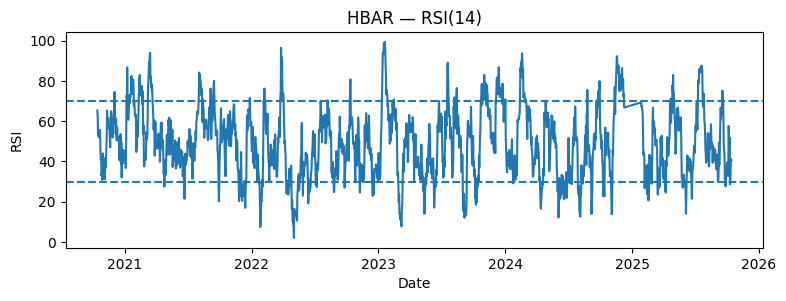

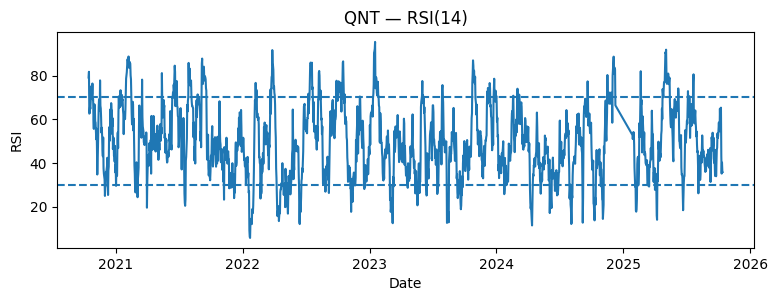

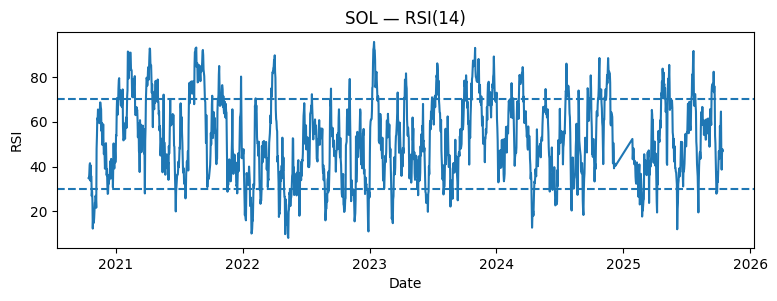

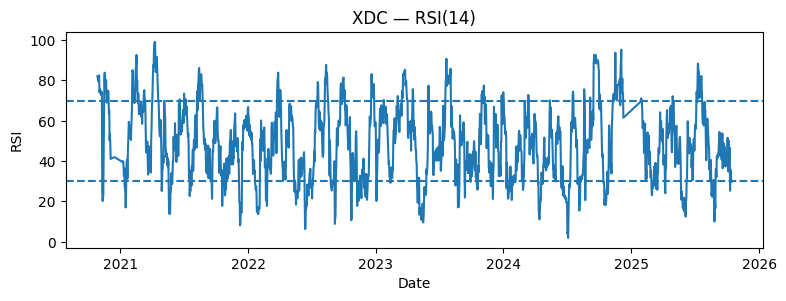

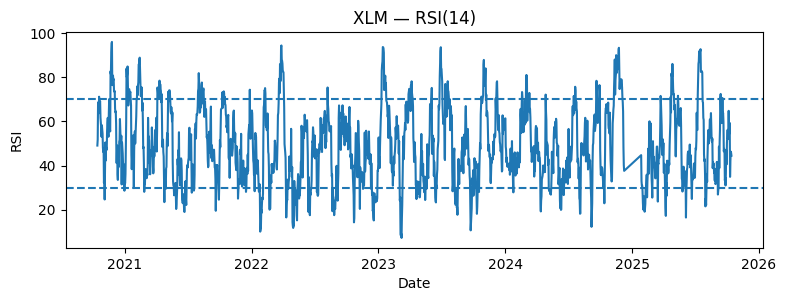

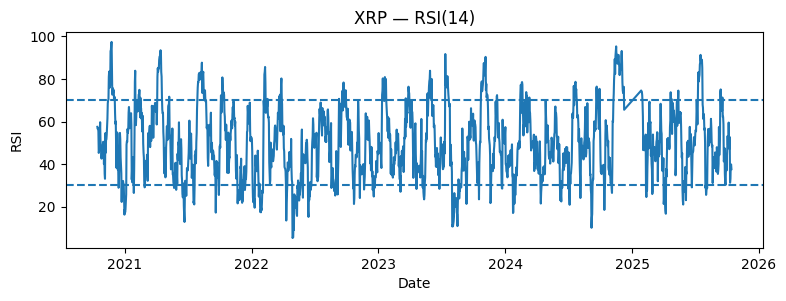

In [24]:

# These must already exist from earlier cells
assert "recent" in globals(), "recent DataFrame is missing. Re-run the earlier cells."
symbols = sorted(recent["Symbol"].unique())
print("Symbols:", symbols)

def save_plot(path):
    plt.tight_layout()
    plt.show()
    plt.close()
    

# ----- MACD (line + signal) -----
for sym in symbols:
    g = recent[recent["Symbol"]==sym]
    try:
        plt.figure(figsize=(9,2.6))
        plt.plot(g["Date"], g["macd_line"],   label="MACD line")
        plt.plot(g["Date"], g["macd_signal"], label="Signal")
        plt.title(f"{sym} — MACD")
        plt.xlabel("Date"); plt.ylabel("MACD"); plt.legend()
        plt.show()

        plt.figure(figsize=(9,2.2))
        plt.bar(g["Date"], g["macd_hist"])
        plt.title(f"{sym} — MACD Histogram")
        plt.xlabel("Date"); plt.ylabel("Hist")
        plt.show()
    except Exception as e:
        print(f"[MACD ERROR] {sym}: {e}")

# ----- RSI(14) -----
for sym in symbols:
    g = recent[recent["Symbol"]==sym]
    try:
        plt.figure(figsize=(9,2.8))
        plt.plot(g["Date"], g["rsi_14"], label="RSI(14)")
        plt.axhline(30, linestyle="--"); plt.axhline(70, linestyle="--")
        plt.title(f"{sym} — RSI(14)")
        plt.xlabel("Date"); plt.ylabel("RSI")
        plt.show()
    except Exception as e:
        print(f"[RSI ERROR] {sym}: {e}")


---

# Notes:

- Initially I was saving the plots as PNG files in the Reports/ folder, but now I have changed the code to display the plots directly using plt.show(). This allows for immediate visualization without saving files as reports folder was too large. 

---